# ISEL - PDS 
## Semestre 2021/22
# <br>
###  <center> Trabalho Prático 1</center>
# </br>

Trabalho realizado por:
* Fábio Dias, número <b> 42921 </b>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from ipywidgets import interact

# I. Geração de Sinais

<b>1.</b> Use a função plot para representar os seguintes sinais contínuos (use a base de tempo que achar adequada):
<br>
<br><b>&emsp;&emsp;a)&emsp;</b> $a(t) = 2cos(2\pi19t) + 5sin(2\pi20t)$
<br>
<br><b>&emsp;&emsp;b)&emsp;</b> $b(t) = (1 + \frac{1}{2} cos(2\pi12t))cos(2\pi200t)$
<br>
<br><b>&emsp;&emsp;c)&emsp;</b> $c(t) = e^{-20t^2}cos(2\pi100t)(\mu(t+3)-\mu(t+3)) $
<br>
<br><b>&emsp;&emsp;d)&emsp;</b> $d(t) = \frac{4}{\pi}\sum_{k=1}^{N}\frac{sin(2\pi(2k-1)f_0t)}{2k-1}$ , onde $f_0 = 5Hz$. Valide o resultado separadamente com $N \in \{ 1, 10, 1000 \} $
<br>
<br><b>&emsp;&emsp;e)&emsp;</b> $e(t) = \frac{8}{\pi^2}\sum_{k=1}^{N}(-1)^k\frac{sin(2\pi(2k-1)f_0t)}{(2k-1)^2}$ , onde $f_0 = 1Hz$. Valide o resultado separadamente com $N \in \{ 1, 10, 1000 \} $

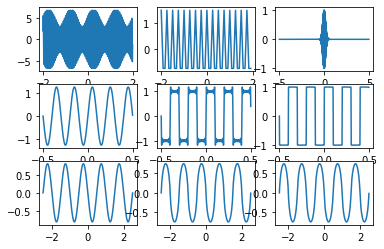

In [3]:
#SubPlot Settings
nRows = 3
nCols = 3

# a)
Fs = 200

t_a = np.arange(-2, 2, 1/Fs)
a = 2 * np.cos(2 * np.pi * 19 * t_a) + 5 * np.sin(2 * np.pi * 20 * t_a)

plt.subplot(nRows, nCols, 1)
plt.plot(t_a, a)


# b)
Fs = 12

t_b = np.arange(-2, 2, 1/Fs)
b = (1 + (1/2) * np.cos(2 * np.pi * 12 * t_b)) * np.cos(2 * np.pi * 200 * t_b)

plt.subplot(nRows, nCols, 2)
plt.plot(t_b, b)


# c)
Fs = 1000

t_c = np.arange(-5, 5, 1/Fs)
u = t_c >= 0 
c = np.exp(-20 * t_c**2) * np.cos(2 * np.pi * 100 * t_c) * (((t_c >= 3) * 1.0) - ((t_c >= -3) * 1.0))

plt.subplot(nRows, nCols, 3)
plt.plot(t_c, c)


# d)
Fs = 1000

N = [1, 10, 1000]
f0 = 5
t_d = np.arange(-0.5, 0.5, 1/Fs)
nSample = 4;

for n in N:
    d = np.zeros(len(t_d));
    
    for k in range(1 , n + 1):
        d += (np.sin(2 * np.pi * (2 * k - 1) * f0 * t_d)) / (2 * k - 1)
    d *= 4 / np.pi
    
    plt.subplot(nRows, nCols, nSample)
    plt.plot(t_d, d)
    
    nSample += 1

    
# e)
Fs = 1000

N = [1, 10, 1000]
f0 = 1
t_e = np.arange(-2.5, 2.5, 1/Fs)
nSample = 7;

for n in N:
    e = np.zeros(len(t_e));
    
    for k in range(1 , n + 1):
        e += (-1**k) * ((np.sin(2 * np.pi * (2 * k - 1) * f0 * t_e)) / (2 * k - 1)**2)
    e *= 8 / np.pi**2
    
    plt.subplot(nRows, nCols, nSample)
    plt.plot(t_e, e)
    
    nSample += 1

<b>2.</b> Analise os sinais no domínio da frequência, representando os espectro de amplitude usando a <i>fft<i>.

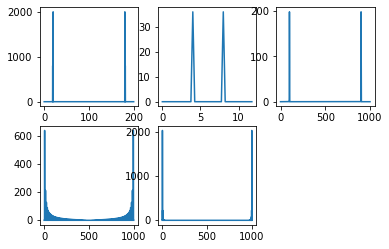

In [4]:
#SubPlot Settings
nRows = 2
nCols = 3

# a)
Fs = 200

f_a = np.arange(0, Fs, Fs / len(t_a))
Xa = np.fft.fft(a)

plt.subplot(nRows, nCols, 1)
plt.plot(f_a, np.abs(Xa))

# b)
Fs = 12

f_b = np.arange(0, Fs, Fs / len(t_b))
Xb = np.fft.fft(b)

plt.subplot(nRows, nCols, 2)
plt.plot(f_b, np.abs(Xb))

# c)
Fs = 1000

f_c = np.arange(0, Fs, Fs / len(t_c))
Xc = np.fft.fft(c)

plt.subplot(nRows, nCols, 3)
plt.plot(f_c, np.abs(Xc))

# d)
Fs = 1000

f_d = np.arange(0, Fs, Fs / len(t_d))
Xd = np.fft.fft(d)

plt.subplot(nRows, nCols, 4)
plt.plot(f_d, np.abs(Xd))

# e)
Fs = 1000

f_e = np.arange(0, Fs, Fs / len(t_e))
Xe = np.fft.fft(e)

plt.subplot(nRows, nCols, 5)
plt.plot(f_e, np.abs(Xe))

<b>3.</b> Represente os espectrogramas de modo a analisar simultaneamente o domínio tempo e frequência.

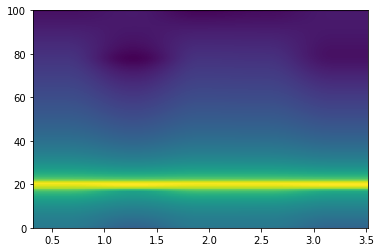

<ipython-input-5-f3492557c2be>:3: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=48).
  plt.specgram(b, Fs=12)


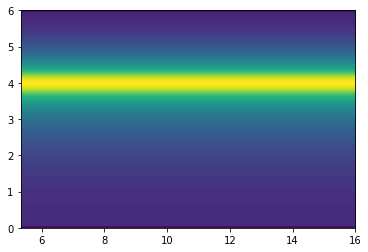

C:\Users\fabio\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


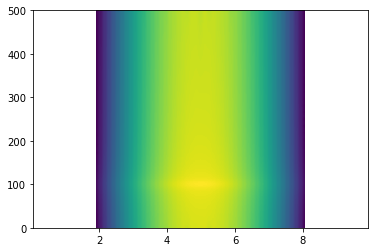

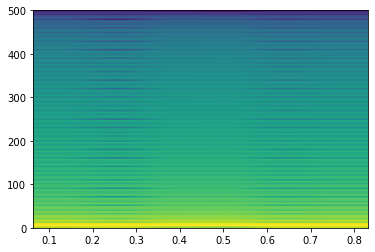

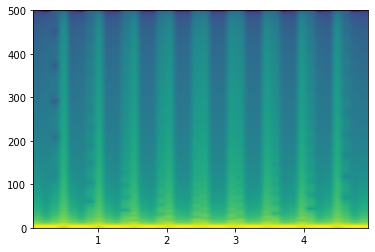

In [5]:
plt.specgram(a, Fs=200)
plt.show()
plt.specgram(b, Fs=12)
plt.show()
plt.specgram(c, Fs=1000)
plt.show()
plt.specgram(d, Fs=1000)
plt.show()
plt.specgram(e, Fs=1000)
plt.show()

# II. Sintese de Notas Musicais

<b>4.</b> Desenvolva uma função que crie composições musicais baseadas em sinusóides. A função tem como argumentos
de entrada uma lista de tuplos representantes das notas e suas durações no formato (nota, número de unidades
de tempo) e a unidade de tempo (em bpm). A nota deve ser expressa usando a notação ABC, exemplo: ( (’c’, 4),
(’e’, 4), (’g’, 4), (’c5’, 1) ) ). A função deve retornar um array com as amplitudes instantaneas correspondentes à
composição musical. Deve exemplificar o funcionamento da função com uma composição onde varie a frequência
e a duração das notas. Visualize o sinal no domínio do tempo e na frequência (espectro e espectrograma). Oiça
o sinal criado e altere os bpms para verificar as diferenças. Para os mais entusiastas sugere-se a exploração da
utlização de vários canais, exemplo: melodia e acordes.

(array([[1.16131652e-07, 1.13175495e-07, 1.06762227e-07, ...,
         2.38511237e-08, 3.11450364e-08, 1.95961080e-07],
        [3.78665843e-07, 3.72979794e-07, 3.60644132e-07, ...,
         6.78307743e-08, 8.25923629e-08, 4.16150863e-07],
        [1.27986532e-06, 1.27517374e-06, 1.26499554e-06, ...,
         1.34511487e-07, 1.49811474e-07, 4.95535825e-07],
        ...,
        [3.94002763e-14, 5.01117567e-14, 7.33498984e-14, ...,
         1.09676268e-12, 1.06806964e-12, 4.19704154e-13],
        [1.03717342e-14, 2.17798097e-14, 4.65291865e-14, ...,
         1.09804960e-12, 1.06901465e-12, 4.12935821e-13],
        [3.52950540e-16, 6.17296877e-15, 1.87992726e-14, ...,
         5.49238853e-13, 5.34664724e-13, 2.05340314e-13]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

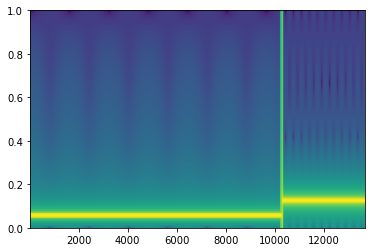

In [6]:
def composicaoMusical(composicao, bpm):
    
    notas = {
        "a1": 27.5,
        "b1": 30.86,
        "c1": 32.7,
        "d1": 36.7,
        "e1": 41.2,
        "f1": 43.65,
        "g1": 48.9,
        "a2": 55,
        "b2": 61.7,
        "c2": 65.4,
        "d2": 73.4,
        "e2": 82.4,
        "f2": 87.3,
        "g2": 97.9,
        "a3": 110,
        "b3": 123.47,
        "c3": 130.8,
        "d3": 146.83,
        "e3": 164.8,
        "f3": 174.6,
        "g3": 196,
        "a4": 220,
        "b4": 246.94,
        "c4": 261.63,
        "d4": 293.66,
        "e4": 329.63,
        "f4": 349.23,
        "g4": 392,
        "a5": 440,
        "b5": 493.88,
        "c5": 523.25,
        "d5": 587.33,
        "e5": 659.26,
        "f5": 698.46,
        "g5": 783.99,
        "a6": 880,
        "b6": 987.77,
        "c6": 1046.5,
        "d6": 1174.7,
        "e6": 1318.5,
        "f6": 1396.9,
        "g6": 1568,
        "a7": 1760,
        "b7": 1975.5,
        "c7": 2093,
        "d7": 2349.3,
        "e7": 2637,
        "f7": 2793.8,
        "g7": 3136,
        "a8": 3520,
        "b8": 3951.1,
        "c8": 4186
    }
    
    
    
    #Arranjar o tamanho do array de frequencias
    tempo = 0
    
    for index in range(len(composicao)):
        duracao = composicao[index][1]
        t = np.arange(0, duracao * (60 / bpm), 1/Fs)
        tempo += len(t)

    #Popular o array com as frequências da composicao
    frequencias = np.zeros(tempo)
    inicio = 0
    
    for index in range(len(composicao)):
        duracao = composicao[index][1]
        t = np.arange(0, duracao * (60 / bpm), 1/Fs)
        frequencias[inicio : inicio + len(t)] = np.cos(2*np.pi*notas[composicao[index][0]]*t)
        inicio += len(t)
    
    return frequencias

Fs = 8000
composicao = composicaoMusical((('a4', 6), ('b5', 2)), 140)
display(Audio(data=composicao, rate=Fs))
plt.specgram(composicao)

<b>5.</b> Crie uma nova versão da função onde seja implementada o modelo ADSR de modo a que as notas criadas sejam
menos artificiais. Deverá ser possível parametrizar o tempo de Attack/Decay/Sustain/Release em percentagem
do tempo da nota / ou em alternativa com valores constantes. Analise as diferenças comparando com a versão
original.

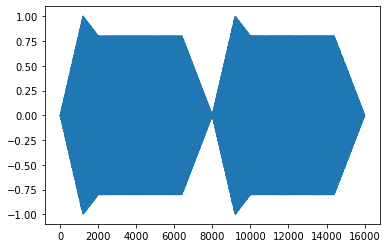

In [7]:
def composicaoMusical(composicao, bpm):
    
    notas = {
        "a1": 27.5,
        "b1": 30.86,
        "c1": 32.7,
        "d1": 36.7,
        "e1": 41.2,
        "f1": 43.65,
        "g1": 48.9,
        "a2": 55,
        "b2": 61.7,
        "c2": 65.4,
        "d2": 73.4,
        "e2": 82.4,
        "f2": 87.3,
        "g2": 97.9,
        "a3": 110,
        "b3": 123.47,
        "c3": 130.8,
        "d3": 146.83,
        "e3": 164.8,
        "f3": 174.6,
        "g3": 196,
        "a4": 220,
        "b4": 246.94,
        "c4": 261.63,
        "d4": 293.66,
        "e4": 329.63,
        "f4": 349.23,
        "g4": 392,
        "a5": 440,
        "b5": 493.88,
        "c5": 523.25,
        "d5": 587.33,
        "e5": 659.26,
        "f5": 698.46,
        "g5": 783.99,
        "a6": 880,
        "b6": 987.77,
        "c6": 1046.5,
        "d6": 1174.7,
        "e6": 1318.5,
        "f6": 1396.9,
        "g6": 1568,
        "a7": 1760,
        "b7": 1975.5,
        "c7": 2093,
        "d7": 2349.3,
        "e7": 2637,
        "f7": 2793.8,
        "g7": 3136,
        "a8": 3520,
        "b8": 3951.1,
        "c8": 4186
    }
    
    #Arranjar o tamanho do array de frequencias
    tempo = 0
    
    for index in range(len(composicao)):
        duracao = composicao[index][1]
        t = np.arange(0, duracao * (60 / bpm), 1/Fs)
        tempo += len(t)

    #Popular o array com as frequências da composicao
    frequencias = np.zeros(tempo)
    inicio = 0
    
    for index in range(len(composicao)):
        duracao = composicao[index][1]
        t = np.arange(0, duracao * (60 / bpm), 1/Fs)
        sinal = np.cos(2*np.pi*notas[composicao[index][0]]*t)
        
        #Criação do envelope
        envelope = np.zeros(len(sinal))

        #Percentagens dos tempos das componentes do ADSR
        a = 0.15
        d = 0.1
        s = 0.55
        r = 0.2

        #Obter valores para o ADSR
        t_a = np.arange(0, int(len(sinal) * a), 1)
        t_d = np.arange(0, int(len(sinal) * d), 1)
        t_s = np.arange(0, int(len(sinal) * s), 1)
        t_r = np.arange(0, int(len(sinal) * r), 1)

        valoresA = (1 / int(len(sinal) * a)) * t_a
        valoresD = (-0.2/(int(len(sinal) * d))) * t_d + 1
        valoresS = 0.8
        valoresR = (-0.8/(int(len(sinal) * r))) * t_r + 0.8

        #Tamanho do ADSR
        t_ADSR = 0

        envelope[t_ADSR : int(len(sinal) * a)] = sinal[0 : int(len(sinal) * a)] * valoresA
        t_ADSR = int(len(sinal) * a)

        envelope[t_ADSR : t_ADSR + int(len(sinal) * d)] = sinal[t_ADSR : t_ADSR + int(len(sinal) * d)] * valoresD
        t_ADSR = t_ADSR + int(len(sinal) * d)

        envelope[t_ADSR : t_ADSR + int(len(sinal) * s)] = sinal[t_ADSR : t_ADSR + int(len(sinal) * s)] * valoresS
        t_ADSR = t_ADSR + int(len(sinal) * s)

        envelope[t_ADSR : t_ADSR + int(len(sinal) * r)] = sinal[t_ADSR : t_ADSR + int(len(sinal) * r)] * valoresR
        
        frequencias[inicio : inicio + len(t)] = envelope
        inicio += len(t)
    
    return frequencias

Fs = 8000
composicao = composicaoMusical((('a4', 1), ('b5', 1)), 60)
display(Audio(data=composicao, rate=Fs))
plt.plot(composicao)
#plt.specgram(composicao)

<b>6.</b> Crie uma nova versão da função onde em vez das sinusóides use ondas triangulares, dentes de serra e outra à
sua escolha. Use os ipywidgets de modo a criar um interface que permita selecionar as várias alternativas.

In [8]:
import ipywidgets as widgets
from scipy import signal

#Isto vai ter de depender do resultado dos radio buttos. Vem em int?
def sintetizadorDeOndas(tipoDeOnda, composicao, bpm):
    
    notas = {
        "a1": 27.5,
        "b1": 30.86,
        "c1": 32.7,
        "d1": 36.7,
        "e1": 41.2,
        "f1": 43.65,
        "g1": 48.9,
        "a2": 55,
        "b2": 61.7,
        "c2": 65.4,
        "d2": 73.4,
        "e2": 82.4,
        "f2": 87.3,
        "g2": 97.9,
        "a3": 110,
        "b3": 123.47,
        "c3": 130.8,
        "d3": 146.83,
        "e3": 164.8,
        "f3": 174.6,
        "g3": 196,
        "a4": 220,
        "b4": 246.94,
        "c4": 261.63,
        "d4": 293.66,
        "e4": 329.63,
        "f4": 349.23,
        "g4": 392,
        "a5": 440,
        "b5": 493.88,
        "c5": 523.25,
        "d5": 587.33,
        "e5": 659.26,
        "f5": 698.46,
        "g5": 783.99,
        "a6": 880,
        "b6": 987.77,
        "c6": 1046.5,
        "d6": 1174.7,
        "e6": 1318.5,
        "f6": 1396.9,
        "g6": 1568,
        "a7": 1760,
        "b7": 1975.5,
        "c7": 2093,
        "d7": 2349.3,
        "e7": 2637,
        "f7": 2793.8,
        "g7": 3136,
        "a8": 3520,
        "b8": 3951.1,
        "c8": 4186
    }
    
    #Arranjar o tamanho do array de frequencias
    tempo = 0
    
    for index in range(len(composicao)):
        duracao = composicao[index][1]
        t = np.arange(0, duracao * (60 / bpm), 1/Fs)
        tempo += len(t)

    #Popular o array com as frequências da composicao
    frequencias = np.zeros(tempo)
    inicio = 0
    
    for index in range(len(composicao)):
        duracao = composicao[index][1]
        t = np.arange(0, duracao * (60 / bpm), 1/Fs)
        
        #Sinusoides
        if tipoDeOnda == 0: #Meto 0 mas tenho de saber que valor retorna
            sinal = np.cos(2*np.pi*notas[composicao[index][0]]*t) 
        #Triangulares
        elif tipoDeOnda == 1:
            sinal = signal.sawtooth(notas[composicao[index][0]]*t, 0.5)
        #Dentes de Serra
        elif tipoDeOnda == 2:
            sinal = signal.sawtooth(notas[composicao[index][0]]*t, 0) 
        else:
            #sinal =
            pass
        
        #Criação do envelope
        envelope = np.zeros(len(sinal))

        #Percentagens dos tempos das componentes do ADSR
        a = 0.15
        d = 0.1
        s = 0.55
        r = 0.2

        #Obter valores para o ADSR
        t_a = np.arange(0, int(len(sinal) * a), 1)
        t_d = np.arange(0, int(len(sinal) * d), 1)
        t_s = np.arange(0, int(len(sinal) * s), 1)
        t_r = np.arange(0, int(len(sinal) * r), 1)

        valoresA = (1 / int(len(sinal) * a)) * t_a
        valoresD = (-0.2/(int(len(sinal) * d))) * t_d + 1
        valoresS = 0.8
        valoresR = (-0.8/(int(len(sinal) * r))) * t_r + 0.8

        #Tamanho do ADSR
        t_ADSR = 0

        envelope[t_ADSR : int(len(sinal) * a)] = sinal[0 : int(len(sinal) * a)] * valoresA
        t_ADSR = int(len(sinal) * a)

        envelope[t_ADSR : t_ADSR + int(len(sinal) * d)] = sinal[t_ADSR : t_ADSR + int(len(sinal) * d)] * valoresD
        t_ADSR = t_ADSR + int(len(sinal) * d)

        envelope[t_ADSR : t_ADSR + int(len(sinal) * s)] = sinal[t_ADSR : t_ADSR + int(len(sinal) * s)] * valoresS
        t_ADSR = t_ADSR + int(len(sinal) * s)

        envelope[t_ADSR : t_ADSR + int(len(sinal) * r)] = sinal[t_ADSR : t_ADSR + int(len(sinal) * r)] * valoresR
        
        frequencias[inicio : inicio + len(t)] = envelope
        inicio += len(t)
    
    return frequencias

def seleccaoDeOnda(tipo):
    
    Fs = 8000
    bpm = 60
    
    composicao = (('a4', 1), ('b5', 1))
    melodia = np.zeros(0)
    
    if tipo == 'sinusoides':
        melodia = sintetizadorDeOndas(0, composicao, bpm)
    elif tipo == 'triangulares':
        melodia = sintetizadorDeOndas(1, composicao, bpm)
    elif tipo == 'dentes de serra':
        melodia = sintetizadorDeOndas(2, composicao, bpm)
    else:
        melodia = sintetizadorDeOndas(3, composicao, bpm)
    display(Audio(data=melodia, rate=Fs))

#assim que faço x = widgets.radioButtons(...) as opções interactivas desaparecem
tipoDeOnda = widgets.RadioButtons(options=['sinusoides', 'triangulares', 'dentes de serra', 'quadradas'], disabled=False)
    
Fs = 8000
#Forçado a Sinusoides
#composicao = sintetizadorDeOndas(0, (('a4', 1), ('b5', 1)), 60)
#display(Audio(data=composicao, rate=Fs))

In [9]:
widgets.interact(seleccaoDeOnda, tipo = tipoDeOnda)

interactive(children=(RadioButtons(description='tipo', options=('sinusoides', 'triangulares', 'dentes de serra…

<function __main__.seleccaoDeOnda(tipo)>

# III. Processamento e visualização de informação geográfica

<b>7.</b> O processamento de informação geográfica é uma ferramenta cada vez mais útil em múltiplas aplicações.<br>
Pretende-se estudar uma etapa da volta a França em bicicleta de 2019 (a 14ª etapa) - resumo do que aconteceu aqui https://www.cyclingnews.com/races/tour-de-france-2019/stage-14/results/. São fornecidos ficheiros json com os dados de vários participantes e pretende-se que sejam explorados usando o jupyther e o ipyleaflet. Pretende-se que seja desenhada a etapa (com polígonos), calculados o nº de km a subir e a descer, determinada a velocidade média (em todo o percurso e separadamente nos troços a subir e a descer), a distância em plano, etc. Devem comparar ainda a evolução do participante que ficou melhor colocado com a do que ficou pior colocado

In [10]:
from ipyleaflet import Map, basemaps, GeoJSON
import json
import os
import requests

#https://geojson.io/
center = [43.058854606434494, -0.06866455078125] #[lat, long]
#-9.116232991218567,            38.75565621200153 longitude, latitude ] 
zoom = 10

m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)

In [11]:
jsonFile = open("voltaFranca/thibaut-pinot-14th-stage-Tour-de-France.json", 'r')
data = json.load(jsonFile)

latitude = np.zeros(len(data['latlng']))
longitude = np.zeros(len(data['latlng']))

index = 0

for i in data['latlng']:
    latitude[index] = i[0]
    longitude[index] = i[1]
    index = index + 1

latlng = np.zeros((len(data['latlng']), 2))

for i in range(len(data['latlng'])):
    latlng[i][0] = data['latlng'][i][1]
    latlng[i][1] = data['latlng'][i][0]

dados = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "LineString",
        "coordinates": latlng.tolist()
      }
    }
  ]
}

g = GeoJSON(data=dados)

m.add_layer(g)
m

Map(center=[43.058854606434494, -0.06866455078125], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [12]:
data.keys()

dict_keys(['altitude', 'watts_calc', 'latlng', 'velocity_smooth', 'cadence', 'grade_smooth', 'temp', 'distance', 'time'])

In [13]:
time = data['time']

duration = time[len(time) - 1]

hours = int(duration/3600)
minutes = (duration/3600*60) % 60.0
seconds = (duration) % 60.0
print("%d:%02d.%02d" % (hours, minutes, seconds))

3:10.22


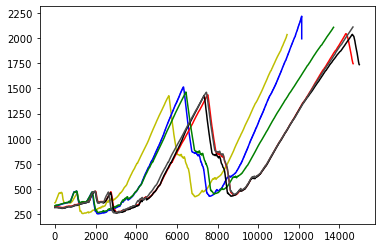

Thibaut Pinot ficou em 1º lugar. 
Steven Kruijswijk ficou em 3º lugar. 
Thomas De Gendt ficou em 71º lugar. 
Maxime Bouet ficou em 143º lugar. 
Michal Kwiatkowski ficou em 144º lugar. 
Marco Haller ficou em 147º lugar. 

A etapa demorou 3:10.22 a ser concluída pelo 1º lugar
Funciona
Funciona
Funciona
Funciona
Funciona
Funciona


In [14]:
#O que quero analisar. Gráficos das altitudes.
#Gráficos das subidas e descidas.
#Velocidade média na volta toda, nas subidas, nas descidas e nos planos
#Torná-lo modular. -> Um só método

#Thibaut Pinot - 1º
#Steven Kruijswijk - 3º
#Thomas De Gendt - 71º
#Maxime Bouet - 143º
#Michal Kwiatkowski - 144º
#Marco Haller - 147º

def getStats():
    nomesDosCiclistas = ["thibaut-pinot", "steven-kruijswijk", "thomas-de-gendt", "maxime-bouet", "michal-kwiatkowski", "marco-haller"]
    lugaresDosCiclistas = [1, 3, 71, 143, 144, 147]
    nomesBemFormatados = ["Thibaut Pinot", "Steven Kruijswijk", "Thomas De Gendt", "Maxime Bouet", "Michal Kwiatkowski", "Marco Haller"]
    
    data = np.zeros(len(nomesDosCiclistas), dict)
    
    #Recolher Data
    for i in range(len(data)):
        nomeCiclista = nomesDosCiclistas[i]
        
        jsonFile = open("voltaFranca/" + nomeCiclista +"-14th-stage-Tour-de-France.json", 'r')
        dataCiclista = json.load(jsonFile)
        
        data[i] = dataCiclista
    
    #Mostrar plot's
    legendasPlot = ['y', 'b', 'r', 'g', 'k', '0.3']
    legenda = ""
    for index in range(len(data)):
        legenda = legenda + nomesBemFormatados[index] + " ficou em " + str(lugaresDosCiclistas[index]) + "º lugar. \n" 
        plt.plot(data[index]['altitude'], legendasPlot[index])
    
    plt.show()
    print(legenda)
    
    #Tempo de conclusão da Etapa
    duration = time[len(time) - 1]

    hours = int(duration/3600)
    minutes = (duration/3600*60) % 60.0
    seconds = (duration) % 60.0
    print("A etapa demorou %d:%02d.%02d a ser concluída pelo 1º lugar" % (hours, minutes, seconds))
    
    #Subidas
    subidas = np.zeros(len(data), list)
    subida = 0
    subidaThreshold = 10.
    
    '''
    for index in range(len(data)):
        for indexAltitude in range(len(data[index]['altitude'])):
            subida = np.zeros(len(data[index]['altitude']))
            
            derivadaAltitude = np.diff(data[index]['altitude'])
            subida[index] = (data[index]['altitude'][indexAltitude] > subidaThreshold) * 1.0
        subidas[index] = subida
    
    '''
    
    #Infelizmente, não vou conseguir fazer mais do que isto. Lamento.
    
getStats()